In [1]:
#!pip install statsmodels


In [2]:
#!pip install pandas_datareader
#!pip install datetime
#!pip install yfinance
#!pip install sklearn
#!pip install PyPortfolioOpt

In [3]:
#!pip install pandas_ta

In [4]:
#from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

In [5]:
#!pip install requests beautifulsoup4


# Step 1: Import the Data

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
response = requests.get(url, verify=True)
soup = BeautifulSoup(response.text, 'html.parser')

# Use BeautifulSoup to extract the table data
table = soup.find('table', {'class': 'wikitable'})
sp500 = pd.read_html(str(table))[0]

In [7]:
sp500

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
497,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [8]:
sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')

symbols_list = sp500['Symbol'].unique().tolist()

In [9]:
symbols_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA'

In [10]:
end_date = '2024-03-16'
start_date = pd.to_datetime(end_date)-pd.DateOffset(365*5)
end_date
start_date

Timestamp('2019-03-18 00:00:00')

In [11]:
df = yf.download(tickers=symbols_list,start=start_date,end=end_date)
df

[*********************100%***********************]  502 of 502 completed


2 Failed downloads:
['GEV', 'SOLV']: Exception("%ticker%: Data doesn't exist for startDate = 1552881600, endDate = 1710561600")


Adj Close                                                 \
                     A        AAL        AAPL        ABBV        ABNB   
Date                                                                    
2019-03-18   77.998062  30.964848   45.251667   63.432495         NaN   
2019-03-19   78.219620  31.172073   44.893051   63.566219         NaN   
2019-03-20   77.949890  30.550407   45.285355   63.259468         NaN   
2019-03-21   78.990257  31.033924   46.953236   63.896553         NaN   
2019-03-22   76.090729  30.165567   45.980900   62.732513         NaN   
...                ...        ...         ...         ...         ...   
2024-03-11  147.051102  14.650000  172.750000  177.967957  162.990005   
2024-03-12  147.600220  13.960000  173.229996  179.246017  166.669998   
2024-03-13  147.580261  14.000000  171.130005  178.195831  164.759995   
2024-03-14  144.974487  13.990000  173.000000  179.523422  166.440002   
2024-03-15  147.240799  13.960000  172.619995  176.234146  160.639999   

                                                                       ...  \
                   ABT       ACGL         ACN        ADBE         ADI  ...   
Date                                                                   ...   
2019-03-18   72.115868  32.840000  154.008163  257.760010   99.305000  ...   
2019-03-19   73.149605  32.360001  153.795334  260.420013  100.032837  ...   
2019-03-20   73.131317  31.980000  153.860138  259.739990   98.813698  ...   
2019-03-21   73.241074  32.290001  155.683151  264.179993  100.242081  ...   
2019-03-22   71.329079  32.060001  152.907043  259.690002   97.712837  ...   
...                ...        ...         ...         ...         ...  ...   
2024-03-11  119.596870  90.309998  371.780457  560.419983  198.210007  ...   
2024-03-12  120.164055  90.919998  379.012482  579.140015  199.199997  ...   
2024-03-13  119.567017  91.000000  377.259247  573.549988  198.600006  ...   
2024-03-14  118.263481  91.029999  376.751221  570.450012  194.429993  ...   
2024-03-15  114.920059  91.879997  373.155151  492.459991  195.199997  ...   

            Volume                                                          \
               WTW       WY     WYNN       XEL       XOM      XYL      YUM   
Date                                                                         
2019-03-18  364300  3872500  1749700   3281000   9840600   671000  1615200   
2019-03-19  485300  3485800  1476400   2598700  13936500   941500  2175500   
2019-03-20  488200  4190000  1798500   2394400  13133600   563700  2928800   
2019-03-21  555400  4429100  1465400   2244900  10117000   393400  1014100   
2019-03-22  651900  4601400  1706800   2899100  12497700   711700  1033400   
...            ...      ...      ...       ...       ...      ...      ...   
2024-03-11  608500  2202100  1943400   9838100  17577300  1019900  1711300   
2024-03-12  641900  3330900  1436800   8809700  14957200  1029700  1464800   
2024-03-13  530100  2508500  1138400   5420000  17122200   872500  3361400   
2024-03-14  482900  4124900  1882700  11860000  22121000  1335500  3091900   
2024-03-15  885400  6848900  4404600  11153200  38263900  1537600  4164800   

                                      
                ZBH    ZBRA      ZTS  
Date                                  
2019-03-18  1310778  400200  2144100  
2019-03-19  1265046  363300  1903400  
2019-03-20  2047331  540600  1592000  
2019-03-21  1443648  259200  1658900  
2019-03-22  1230953  534500  1489200  
...             ...     ...      ...  
2024-03-11  1079800  268800  3383500  
2024-03-12  1073000  316100  2598400  
2024-03-13   847000  286200  5947400  
2024-03-14  1203900  375300  6432600  
2024-03-15  2672400  539300  3399500  

[1259 rows x 3012 columns]

In [12]:
df.stack()

Adj Close       Close        High         Low        Open  \
Date                                                                          
2019-03-18 A      77.998062   80.970001   81.290001   80.489998   81.099998   
           AAL    30.964848   31.379999   31.580000   31.030001   31.500000   
           AAPL   45.251667   47.005001   47.097500   46.447498   46.450001   
           ABBV   63.432495   80.650002   81.750000   80.279999   81.339996   
           ABT    72.115868   78.830002   79.949997   77.970001   79.949997   
...                     ...         ...         ...         ...         ...   
2024-03-15 XYL   127.269997  127.269997  128.240005  126.180000  126.800003   
           YUM   136.839996  136.839996  137.529999  136.089996  136.470001   
           ZBH   124.935066  125.169998  125.680000  124.379997  124.379997   
           ZBRA  285.859985  285.859985  286.359985  277.500000  277.500000   
           ZTS   172.079361  172.570007  175.509995  171.610001  173.779999   

                      Volume  
Date                          
2019-03-18 A       1617700.0  
           AAL     6832700.0  
           AAPL  104879200.0  
           ABBV    5550100.0  
           ABT     7671100.0  
...                      ...  
2024-03-15 XYL     1537600.0  
           YUM     4164800.0  
           ZBH     2672400.0  
           ZBRA     539300.0  
           ZTS     3399500.0  

[624615 rows x 6 columns]

In [13]:
print(df.columns)

MultiIndex([('Adj Close',    'A'),
            ('Adj Close',  'AAL'),
            ('Adj Close', 'AAPL'),
            ('Adj Close', 'ABBV'),
            ('Adj Close', 'ABNB'),
            ('Adj Close',  'ABT'),
            ('Adj Close', 'ACGL'),
            ('Adj Close',  'ACN'),
            ('Adj Close', 'ADBE'),
            ('Adj Close',  'ADI'),
            ...
            (   'Volume',  'WTW'),
            (   'Volume',   'WY'),
            (   'Volume', 'WYNN'),
            (   'Volume',  'XEL'),
            (   'Volume',  'XOM'),
            (   'Volume',  'XYL'),
            (   'Volume',  'YUM'),
            (   'Volume',  'ZBH'),
            (   'Volume', 'ZBRA'),
            (   'Volume',  'ZTS')],
           length=3012)


In [14]:
df1=df.stack()
df1

Adj Close       Close        High         Low        Open  \
Date                                                                          
2019-03-18 A      77.998062   80.970001   81.290001   80.489998   81.099998   
           AAL    30.964848   31.379999   31.580000   31.030001   31.500000   
           AAPL   45.251667   47.005001   47.097500   46.447498   46.450001   
           ABBV   63.432495   80.650002   81.750000   80.279999   81.339996   
           ABT    72.115868   78.830002   79.949997   77.970001   79.949997   
...                     ...         ...         ...         ...         ...   
2024-03-15 XYL   127.269997  127.269997  128.240005  126.180000  126.800003   
           YUM   136.839996  136.839996  137.529999  136.089996  136.470001   
           ZBH   124.935066  125.169998  125.680000  124.379997  124.379997   
           ZBRA  285.859985  285.859985  286.359985  277.500000  277.500000   
           ZTS   172.079361  172.570007  175.509995  171.610001  173.779999   

                      Volume  
Date                          
2019-03-18 A       1617700.0  
           AAL     6832700.0  
           AAPL  104879200.0  
           ABBV    5550100.0  
           ABT     7671100.0  
...                      ...  
2024-03-15 XYL     1537600.0  
           YUM     4164800.0  
           ZBH     2672400.0  
           ZBRA     539300.0  
           ZTS     3399500.0  

[624615 rows x 6 columns]

In [15]:
df1.index.names=['Dates','Ticker']

In [16]:
df1.columns = df1.columns.str.lower()

In [17]:
df1

adj close       close        high         low        open  \
Dates      Ticker                                                               
2019-03-18 A        77.998062   80.970001   81.290001   80.489998   81.099998   
           AAL      30.964848   31.379999   31.580000   31.030001   31.500000   
           AAPL     45.251667   47.005001   47.097500   46.447498   46.450001   
           ABBV     63.432495   80.650002   81.750000   80.279999   81.339996   
           ABT      72.115868   78.830002   79.949997   77.970001   79.949997   
...                       ...         ...         ...         ...         ...   
2024-03-15 XYL     127.269997  127.269997  128.240005  126.180000  126.800003   
           YUM     136.839996  136.839996  137.529999  136.089996  136.470001   
           ZBH     124.935066  125.169998  125.680000  124.379997  124.379997   
           ZBRA    285.859985  285.859985  286.359985  277.500000  277.500000   
           ZTS     172.079361  172.570007  175.509995  171.610001  173.779999   

                        volume  
Dates      Ticker               
2019-03-18 A         1617700.0  
           AAL       6832700.0  
           AAPL    104879200.0  
           ABBV      5550100.0  
           ABT       7671100.0  
...                        ...  
2024-03-15 XYL       1537600.0  
           YUM       4164800.0  
           ZBH       2672400.0  
           ZBRA       539300.0  
           ZTS       3399500.0  

[624615 rows x 6 columns]

Here We are ready with the data. Now we will proceed to step 2. 

# Step 2: Data Preprocessing. Creating Metrics. 

In [18]:
#Garman-Klass Volatility
df1['garman_klass_vol'] = ((np.log(df1['high'])-np.log(df1['low']))**2)/2-(2*np.log(2)-1)*((np.log(df1['adj close'])-np.log(df1['open']))**2)
df1.head()

adj close      close       high        low  \
Dates               Ticker                                               
2019-03-18 00:00:00 A       77.998062  80.970001  81.290001  80.489998   
                    AAL     30.964848  31.379999  31.580000  31.030001   
                    AAPL    45.251667  47.005001  47.097500  46.447498   
                    ABBV    63.432495  80.650002  81.750000  80.279999   
                    ABT     72.115868  78.830002  79.949997  77.970001   

                                 open       volume  garman_klass_vol  
Dates               Ticker                                            
2019-03-18 00:00:00 A       81.099998    1617700.0         -0.000539  
                    AAL     31.500000    6832700.0          0.000041  
                    AAPL    46.450001  104879200.0         -0.000167  
                    ABBV    81.339996    5550100.0         -0.023721  
                    ABT     79.949997    7671100.0         -0.003794

In [19]:
# RSI index
df1['rsi'] = df1.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

In [20]:
# Bollinger Band
df1['bb_low'] = df1.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])                                                          
df1['bb_mid'] = df1.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])                                                          
df1['bb_high'] = df1.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])


In [21]:
df1.head()

adj close      close       high        low  \
Dates               Ticker                                               
2019-03-18 00:00:00 A       77.998062  80.970001  81.290001  80.489998   
                    AAL     30.964848  31.379999  31.580000  31.030001   
                    AAPL    45.251667  47.005001  47.097500  46.447498   
                    ABBV    63.432495  80.650002  81.750000  80.279999   
                    ABT     72.115868  78.830002  79.949997  77.970001   

                                 open       volume  garman_klass_vol  rsi  \
Dates               Ticker                                                  
2019-03-18 00:00:00 A       81.099998    1617700.0         -0.000539  NaN   
                    AAL     31.500000    6832700.0          0.000041  NaN   
                    AAPL    46.450001  104879200.0         -0.000167  NaN   
                    ABBV    81.339996    5550100.0         -0.023721  NaN   
                    ABT     79.949997    7671100.0         -0.003794  NaN   

                            bb_low  bb_mid  bb_high  
Dates               Ticker                           
2019-03-18 00:00:00 A          NaN     NaN      NaN  
                    AAL        NaN     NaN      NaN  
                    AAPL       NaN     NaN      NaN  
                    ABBV       NaN     NaN      NaN  
                    ABT        NaN     NaN      NaN

In [22]:
#atr
def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'],
                        low=stock_data['low'],
                        close=stock_data['close'],
                        length=14)
    return atr.sub(atr.mean()).div(atr.std())

df1['atr'] = df1.groupby(level=1, group_keys=False).apply(compute_atr)

df1['dollar_volume'] = (df1['adj close']*df1['volume'])/1e6

In [23]:
# MACD
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df1['macd'] = df1.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)


In [24]:
# Dollar Volume
df1['dollar_volume'] = (df1['adj close']*df1['volume'])/1e6

df1

adj close       close        high         low        open  \
Dates      Ticker                                                               
2019-03-18 A        77.998062   80.970001   81.290001   80.489998   81.099998   
           AAL      30.964848   31.379999   31.580000   31.030001   31.500000   
           AAPL     45.251667   47.005001   47.097500   46.447498   46.450001   
           ABBV     63.432495   80.650002   81.750000   80.279999   81.339996   
           ABT      72.115868   78.830002   79.949997   77.970001   79.949997   
...                       ...         ...         ...         ...         ...   
2024-03-15 XYL     127.269997  127.269997  128.240005  126.180000  126.800003   
           YUM     136.839996  136.839996  137.529999  136.089996  136.470001   
           ZBH     124.935066  125.169998  125.680000  124.379997  124.379997   
           ZBRA    285.859985  285.859985  286.359985  277.500000  277.500000   
           ZTS     172.079361  172.570007  175.509995  171.610001  173.779999   

                        volume  garman_klass_vol        rsi    bb_low  \
Dates      Ticker                                                       
2019-03-18 A         1617700.0         -0.000539        NaN       NaN   
           AAL       6832700.0          0.000041        NaN       NaN   
           AAPL    104879200.0         -0.000167        NaN       NaN   
           ABBV      5550100.0         -0.023721        NaN       NaN   
           ABT       7671100.0         -0.003794        NaN       NaN   
...                        ...               ...        ...       ...   
2024-03-15 XYL       1537600.0          0.000126  64.201845  4.823663   
           YUM       4164800.0          0.000053  55.090612  4.906940   
           ZBH       2672400.0          0.000046  50.843721  4.819924   
           ZBRA       539300.0          0.000154  58.161867  5.601932   
           ZTS       3399500.0          0.000215  34.212266  5.147533   

                     bb_mid   bb_high       atr  dollar_volume      macd  
Dates      Ticker                                                         
2019-03-18 A            NaN       NaN       NaN     126.177465       NaN  
           AAL          NaN       NaN       NaN     211.573514       NaN  
           AAPL         NaN       NaN       NaN    4745.958636       NaN  
           ABBV         NaN       NaN       NaN     352.056691       NaN  
           ABT          NaN       NaN       NaN     553.208032       NaN  
...                     ...       ...       ...            ...       ...  
2024-03-15 XYL     4.846521  4.869378 -0.763488     195.690347  1.009029  
           YUM     4.933726  4.960513 -0.370440     569.911217  0.859358  
           ZBH     4.844399  4.868874 -0.877357     333.876471  0.206646  
           ZBRA    5.642497  5.683062 -0.666630     154.164290  0.635816  
           ZTS     5.235339  5.323144  0.683166     584.983788 -1.733405  

[624615 rows x 14 columns]

* Aggregate to monthly level and filter top 150 most liquid stocks for each month.

In [25]:
last_cols = [c for c in df1.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open',
                                                          'high', 'low', 'close']]

In [27]:
# Convert the 'Dates' level of the multi-index to a DatetimeIndex
df1.reset_index(level=0, inplace=True)  # Temporarily reset the 'Dates' level to a column
df1['Dates'] = pd.to_datetime(df1['Dates'])  # Convert 'Dates' column to datetime
df1.set_index(['Dates','Ticker'], inplace=True)  # Set the multi-level index again, now with 'Dates' as datetime


In [28]:
df1

adj close       close        high         low        open  \
Dates      Ticker                                                               
2019-03-18 A        77.998062   80.970001   81.290001   80.489998   81.099998   
           AAL      30.964848   31.379999   31.580000   31.030001   31.500000   
           AAPL     45.251667   47.005001   47.097500   46.447498   46.450001   
           ABBV     63.432495   80.650002   81.750000   80.279999   81.339996   
           ABT      72.115868   78.830002   79.949997   77.970001   79.949997   
...                       ...         ...         ...         ...         ...   
2024-03-15 XYL     127.269997  127.269997  128.240005  126.180000  126.800003   
           YUM     136.839996  136.839996  137.529999  136.089996  136.470001   
           ZBH     124.935066  125.169998  125.680000  124.379997  124.379997   
           ZBRA    285.859985  285.859985  286.359985  277.500000  277.500000   
           ZTS     172.079361  172.570007  175.509995  171.610001  173.779999   

                        volume  garman_klass_vol        rsi    bb_low  \
Dates      Ticker                                                       
2019-03-18 A         1617700.0         -0.000539        NaN       NaN   
           AAL       6832700.0          0.000041        NaN       NaN   
           AAPL    104879200.0         -0.000167        NaN       NaN   
           ABBV      5550100.0         -0.023721        NaN       NaN   
           ABT       7671100.0         -0.003794        NaN       NaN   
...                        ...               ...        ...       ...   
2024-03-15 XYL       1537600.0          0.000126  64.201845  4.823663   
           YUM       4164800.0          0.000053  55.090612  4.906940   
           ZBH       2672400.0          0.000046  50.843721  4.819924   
           ZBRA       539300.0          0.000154  58.161867  5.601932   
           ZTS       3399500.0          0.000215  34.212266  5.147533   

                     bb_mid   bb_high       atr  dollar_volume      macd  
Dates      Ticker                                                         
2019-03-18 A            NaN       NaN       NaN     126.177465       NaN  
           AAL          NaN       NaN       NaN     211.573514       NaN  
           AAPL         NaN       NaN       NaN    4745.958636       NaN  
           ABBV         NaN       NaN       NaN     352.056691       NaN  
           ABT          NaN       NaN       NaN     553.208032       NaN  
...                     ...       ...       ...            ...       ...  
2024-03-15 XYL     4.846521  4.869378 -0.763488     195.690347  1.009029  
           YUM     4.933726  4.960513 -0.370440     569.911217  0.859358  
           ZBH     4.844399  4.868874 -0.877357     333.876471  0.206646  
           ZBRA    5.642497  5.683062 -0.666630     154.164290  0.635816  
           ZTS     5.235339  5.323144  0.683166     584.983788 -1.733405  

[624615 rows x 14 columns]

In [29]:
data = (pd.concat([df1.unstack('Ticker')['dollar_volume'].resample('M').mean().stack('Ticker').to_frame('dollar_volume'),
                   df1.unstack()[last_cols].resample('M').last().stack('Ticker')],
                  axis=1)).dropna()

data

dollar_volume   adj close       atr   bb_high    bb_low  \
Dates      Ticker                                                            
2019-04-30 A          150.496685   75.773323 -1.354154  4.407420  4.284220   
           AAL        203.835091   33.727806  0.364764  3.566130  3.512193   
           AAPL      4648.132229   48.296200 -1.864879  3.936352  3.862021   
           ABBV       385.863523   63.269413 -1.027595  4.212956  4.136383   
           ABT        399.295301   73.081543 -0.977361  4.325041  4.232229   
...                          ...         ...       ...       ...       ...   
2024-03-31 XYL        130.027529  127.269997 -0.763488  4.869378  4.823663   
           YUM        318.326858  136.839996 -0.370440  4.960513  4.906940   
           ZBH        157.742603  124.935066 -0.877357  4.868874  4.819924   
           ZBRA        96.293628  285.859985 -0.666630  5.683062  5.601932   
           ZTS        773.570654  172.079361  0.683166  5.323144  5.147533   

                     bb_mid  garman_klass_vol      macd        rsi  
Dates      Ticker                                                   
2019-04-30 A       4.345820         -0.000062 -0.731131  47.154195  
           AAL     3.539161          0.000305  1.081847  58.966558  
           AAPL    3.899187         -0.000733  0.124634  57.530794  
           ABBV    4.174669         -0.022509 -0.468099  47.755127  
           ABT     4.278635         -0.001568 -0.495992  57.233299  
...                     ...               ...       ...        ...  
2024-03-31 XYL     4.846521          0.000126  1.009029  64.201845  
           YUM     4.933726          0.000053  0.859358  55.090612  
           ZBH     4.844399          0.000046  0.206646  50.843721  
           ZBRA    5.642497          0.000154  0.635816  58.161867  
           ZTS     5.235339          0.000215 -1.733405  34.212266  

[29766 rows x 9 columns]

* Calculate 5-year rolling average of dollar volume for each stocks before filtering.

In [30]:
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('Ticker').rolling(5*12, min_periods=12).mean().stack())

data['dollar_vol_rank'] = (data.groupby('Dates')['dollar_volume'].rank(ascending=False))

data = data[data['dollar_vol_rank']<150].drop(['dollar_volume', 'dollar_vol_rank'], axis=1)

data

adj close       atr   bb_high    bb_low    bb_mid  \
Dates      Ticker                                                       
2020-03-31 AAL      12.190000  4.296057  3.025537  2.391544  2.708541   
           AAPL     62.002243  0.675722  4.315534  4.002916  4.159225   
           ABBV     63.388954  3.486880  4.384368  3.966638  4.175503   
           ABT      73.357849  4.531396  4.407603  4.136128  4.271865   
           ACN     153.571991  2.640236  5.176695  4.898086  5.037390   
...                       ...       ...       ...       ...       ...   
2024-03-31 VRTX    407.690002  0.605339  6.080414  6.003594  6.042004   
           VZ       38.860699 -0.463177  3.721650  3.680940  3.701295   
           WFC      57.509998 -0.232947  4.101333  3.963976  4.032654   
           WMT      60.680000  0.075346  4.141257  4.060787  4.101022   
           XOM     111.269997 -0.272636  4.721991  4.627795  4.674893   

                   garman_klass_vol      macd        rsi  
Dates      Ticker                                         
2020-03-31 AAL             0.001119 -3.339103  36.319157  
           AAPL            0.000481 -1.489924  45.291257  
           ABBV           -0.010587 -2.066717  45.422337  
           ABT            -0.003539 -1.447461  49.767203  
           ACN            -0.001802 -1.838850  44.973410  
...                             ...       ...        ...  
2024-03-31 VRTX            0.000052 -1.087329  43.526380  
           VZ              0.000062 -0.185157  46.336038  
           WFC             0.000263  1.898640  73.195392  
           WMT             0.000064  2.016070  68.208139  
           XOM             0.000079  1.396837  68.012724  

[7301 rows x 8 columns]

* Calculate Monthly Returns for different time horizons as features.

In [31]:
def calculate_returns(df):
    outlier_cutoff = 0.005
    lags = [1, 2, 3, 6, 9, 12]

    for lag in lags:

        df[f'return_{lag}m'] = (df['adj close']
                              .pct_change(lag)
                              .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                     upper=x.quantile(1-outlier_cutoff)))
                              .add(1)
                              .pow(1/lag)
                              .sub(1))
    return df
    
    
data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

data

adj close       atr   bb_high    bb_low    bb_mid  \
Dates      Ticker                                                       
2021-03-31 AAL      23.900000  1.326713  3.295447  3.061577  3.178512   
           AAPL    120.056320  0.170675  4.822372  4.757720  4.790046   
           ABBV     94.851723 -0.332480  4.584127  4.507612  4.545870   
           ABT     113.139786  0.500371  4.759409  4.693647  4.726528   
           ACN     263.910553 -0.192152  5.607942  5.465218  5.536580   
...                       ...       ...       ...       ...       ...   
2024-03-31 VRTX    407.690002  0.605339  6.080414  6.003594  6.042004   
           VZ       38.860699 -0.463177  3.721650  3.680940  3.701295   
           WFC      57.509998 -0.232947  4.101333  3.963976  4.032654   
           WMT      60.680000  0.075346  4.141257  4.060787  4.101022   
           XOM     111.269997 -0.272636  4.721991  4.627795  4.674893   

                   garman_klass_vol      macd        rsi  return_1m  \
Dates      Ticker                                                     
2021-03-31 AAL             0.000217  1.437796  60.457977   0.141356   
           AAPL            0.000120 -0.909355  46.979667   0.007340   
           ABBV           -0.005264 -0.358838  54.261959   0.004455   
           ABT            -0.001239  0.010178  51.461144   0.000501   
           ACN            -0.001053  0.897054  62.283697   0.101036   
...                             ...       ...        ...        ...   
2024-03-31 VRTX            0.000052 -1.087329  43.526380  -0.031017   
           VZ              0.000062 -0.185157  46.336038  -0.013243   
           WFC             0.000263  1.898640  73.195392   0.034539   
           WMT             0.000064  2.016070  68.208139   0.038844   
           XOM             0.000079  1.396837  68.012724   0.064581   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
Dates      Ticker                                                          
2021-03-31 AAL      0.179815   0.148653   0.116841   0.069362    0.057709  
           AAPL    -0.037170  -0.026727   0.009464   0.033575    0.055518  
           ABBV     0.027624   0.007214   0.040230   0.015073    0.034156  
           ABT     -0.015288   0.031948   0.017437   0.031807    0.034533  
           ACN      0.068600   0.019995   0.035298   0.029647    0.045751  
...                      ...        ...        ...        ...         ...  
2024-03-31 VRTX    -0.030092   0.000655   0.026863   0.016482    0.021708  
           VZ      -0.034356   0.021260   0.040017   0.012927    0.007302  
           WFC      0.074302   0.055716   0.061426   0.036413    0.039275  
           WMT      0.051359   0.050308   0.023027   0.017653    0.018943  
           XOM      0.045154   0.039507  -0.006116   0.007060    0.004153  

[5304 rows x 14 columns]

# Step 3 : Joining Fama French Factor with the data

In [32]:
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
                               'famafrench',
                               start='2010')[0].drop('RF', axis=1)

factor_data.index = factor_data.index.to_timestamp()

factor_data = factor_data.resample('M').last().div(100)

factor_data.index.name = 'Dates'

factor_data = factor_data.join(data['return_1m']).sort_index()

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
Dates      Ticker                                                   
2021-03-31 AAL     0.0308 -0.0088  0.0739  0.0636  0.0342   0.141356
           AAPL    0.0308 -0.0088  0.0739  0.0636  0.0342   0.007340
           ABBV    0.0308 -0.0088  0.0739  0.0636  0.0342   0.004455
           ABT     0.0308 -0.0088  0.0739  0.0636  0.0342   0.000501
           ACN     0.0308 -0.0088  0.0739  0.0636  0.0342   0.101036
...                   ...     ...     ...     ...     ...        ...
2024-03-31 VRTX    0.0283 -0.0116  0.0419  0.0148  0.0118  -0.031017
           VZ      0.0283 -0.0116  0.0419  0.0148  0.0118  -0.013243
           WFC     0.0283 -0.0116  0.0419  0.0148  0.0118   0.034539
           WMT     0.0283 -0.0116  0.0419  0.0148  0.0118   0.038844
           XOM     0.0283 -0.0116  0.0419  0.0148  0.0118   0.064581

[5304 rows x 6 columns]

* Filter out stocks with less than 10 months of data.

In [33]:
observations = factor_data.groupby(level=1).size()

valid_stocks = observations[observations >= 10]

factor_data = factor_data[factor_data.index.get_level_values('Ticker').isin(valid_stocks.index)]

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
Dates      Ticker                                                   
2021-03-31 AAL     0.0308 -0.0088  0.0739  0.0636  0.0342   0.141356
           AAPL    0.0308 -0.0088  0.0739  0.0636  0.0342   0.007340
           ABBV    0.0308 -0.0088  0.0739  0.0636  0.0342   0.004455
           ABT     0.0308 -0.0088  0.0739  0.0636  0.0342   0.000501
           ACN     0.0308 -0.0088  0.0739  0.0636  0.0342   0.101036
...                   ...     ...     ...     ...     ...        ...
2024-03-31 VRTX    0.0283 -0.0116  0.0419  0.0148  0.0118  -0.031017
           VZ      0.0283 -0.0116  0.0419  0.0148  0.0118  -0.013243
           WFC     0.0283 -0.0116  0.0419  0.0148  0.0118   0.034539
           WMT     0.0283 -0.0116  0.0419  0.0148  0.0118   0.038844
           XOM     0.0283 -0.0116  0.0419  0.0148  0.0118   0.064581

[5245 rows x 6 columns]

* Calculate Rolling Factor Betas.

In [34]:
from statsmodels.regression.rolling import RollingOLS

betas = (factor_data.groupby(level=1,
                            group_keys=False)
         .apply(lambda x: RollingOLS(endog=x['return_1m'], 
                                     exog=sm.add_constant(x.drop('return_1m', axis=1)),
                                     window=min(24, x.shape[0]),
                                     min_nobs=len(x.columns)+1)
         .fit(params_only=True)
         .params
         .drop('const', axis=1)))

betas 

Mkt-RF       SMB       HML       RMW       CMA
Dates      Ticker                                                  
2021-03-31 AAL          NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2024-03-31 VRTX    0.260743  0.698892 -0.724771  0.406002  0.836818
           VZ      0.487660 -1.066618  0.432666  0.002617 -0.066495
           WFC     1.181425  0.304198  1.110232 -0.548605 -0.685762
           WMT     0.520620  0.173656 -0.581037  0.717768  0.516571
           XOM     0.798575  0.021335  0.532321  0.898259  0.473250

[5245 rows x 5 columns]

* Join the rolling factors data to the main features dataframe.

In [35]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']

data = (data.join(betas.groupby('Ticker').shift()))

data.loc[:, factors] = data.groupby('Ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

data = data.drop('adj close', axis=1)

data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5111 entries, (Timestamp('2021-03-31 00:00:00', freq='M'), 'AAL') to (Timestamp('2024-03-31 00:00:00', freq='M'), 'XOM')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   atr               5111 non-null   float64
 1   bb_high           5111 non-null   float64
 2   bb_low            5111 non-null   float64
 3   bb_mid            5111 non-null   float64
 4   garman_klass_vol  5111 non-null   float64
 5   macd              5111 non-null   float64
 6   rsi               5111 non-null   float64
 7   return_1m         5111 non-null   float64
 8   return_2m         5111 non-null   float64
 9   return_3m         5111 non-null   float64
 10  return_6m         5111 non-null   float64
 11  return_9m         5111 non-null   float64
 12  return_12m        5111 non-null   float64
 13  Mkt-RF            5111 non-null   float64
 14  SMB               5111 non-null   float

# Step 4. For each month fit a K-Means Clustering Algorithm to group similar assets based on their RSI index.


In [36]:
target_rsi_values = [30, 45, 55, 70]

initial_centroids = np.zeros((len(target_rsi_values), 18))

initial_centroids[:, 6] = target_rsi_values

initial_centroids

array([[ 0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [38]:
from sklearn.cluster import KMeans

def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4,
                           random_state=0,
                           init=initial_centroids).fit(df).labels_
    return df

data = data.dropna().groupby('Dates', group_keys=False).apply(get_clusters)

data

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
Dates      Ticker                                                             
2021-03-31 AAL     1.326713  3.295447  3.061577  3.178512          0.000217   
           AAPL    0.170675  4.822372  4.757720  4.790046          0.000120   
           ABBV   -0.332480  4.584127  4.507612  4.545870         -0.005264   
           ABT     0.500371  4.759409  4.693647  4.726528         -0.001239   
           ACN    -0.192152  5.607942  5.465218  5.536580         -0.001053   
...                     ...       ...       ...       ...               ...   
2024-03-31 VRTX    0.605339  6.080414  6.003594  6.042004          0.000052   
           VZ     -0.463177  3.721650  3.680940  3.701295          0.000062   
           WFC    -0.232947  4.101333  3.963976  4.032654          0.000263   
           WMT     0.075346  4.141257  4.060787  4.101022          0.000064   
           XOM    -0.272636  4.721991  4.627795  4.674893          0.000079   

                       macd        rsi  return_1m  return_2m  return_3m  \
Dates      Ticker                                                         
2021-03-31 AAL     1.437796  60.457977   0.141356   0.179815   0.148653   
           AAPL   -0.909355  46.979667   0.007340  -0.037170  -0.026727   
           ABBV   -0.358838  54.261959   0.004455   0.027624   0.007214   
           ABT     0.010178  51.461144   0.000501  -0.015288   0.031948   
           ACN     0.897054  62.283697   0.101036   0.068600   0.019995   
...                     ...        ...        ...        ...        ...   
2024-03-31 VRTX   -1.087329  43.526380  -0.031017  -0.030092   0.000655   
           VZ     -0.185157  46.336038  -0.013243  -0.034356   0.021260   
           WFC     1.898640  73.195392   0.034539   0.074302   0.055716   
           WMT     2.016070  68.208139   0.038844   0.051359   0.050308   
           XOM     1.396837  68.012724   0.064581   0.045154   0.039507   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
Dates      Ticker                                                         
2021-03-31 AAL      0.116841   0.069362    0.057709  1.336270  1.530234   
           AAPL     0.009464   0.033575    0.055518  1.214254 -0.224763   
           ABBV     0.040230   0.015073    0.034156  0.388883 -0.008283   
           ABT      0.017437   0.031807    0.034533  0.714537  0.003383   
           ACN      0.035298   0.029647    0.045751  1.243369 -0.392353   
...                      ...        ...         ...       ...       ...   
2024-03-31 VRTX     0.026863   0.016482    0.021708  0.326973  0.593966   
           VZ       0.040017   0.012927    0.007302  0.466727 -1.145694   
           WFC      0.061426   0.036413    0.039275  1.138776  0.256982   
           WMT      0.023027   0.017653    0.018943  0.550486  0.209854   
           XOM     -0.006116   0.007060    0.004153  0.818698 -0.003756   

                        HML       RMW       CMA  cluster  
Dates      Ticker                                         
2021-03-31 AAL     0.075204 -0.393546  0.514100        2  
           AAPL   -0.259319  0.125704 -0.146741        1  
           ABBV   -0.377902  0.421918  1.032816        0  
           ABT    -0.223817  0.473002  0.644879        0  
           ACN    -0.221050  0.326426 -0.080883        3  
...                     ...       ...       ...      ...  
2024-03-31 VRTX   -0.882027  0.214473  1.150840        1  
           VZ      0.792191  0.131931 -0.498050        1  
           WFC     1.528340 -0.354933 -1.227811        3  
           WMT    -0.882478  0.580224  0.905432        3  
           XOM     0.465802  0.835906  0.588760        3  

[5111 rows x 19 columns]

In [39]:
data.head(25)

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
Dates      Ticker                                                             
2021-03-31 AAL     1.326713  3.295447  3.061577  3.178512          0.000217   
           AAPL    0.170675  4.822372  4.757720  4.790046          0.000120   
           ABBV   -0.332480  4.584127  4.507612  4.545870         -0.005264   
           ABT     0.500371  4.759409  4.693647  4.726528         -0.001239   
           ACN    -0.192152  5.607942  5.465218  5.536580         -0.001053   
           ADBE    0.263898  6.167490  6.053931  6.110710          0.000360   
           ADP    -0.041203  5.218730  5.106817  5.162774         -0.001199   
           ADSK    1.134042  5.633612  5.550738  5.592175          0.000384   
           AMAT    1.662609  4.862014  4.642462  4.752238          0.001206   
           AMD    -0.422365  4.436235  4.319514  4.377875          0.000323   
           AMGN    0.076748  5.469226  5.308252  5.388739         -0.003633   
           AMT     0.071031  5.432775  5.190156  5.311465         -0.002038   
           AMZN    0.091639  5.069600  5.008112  5.038856          0.000132   
           AVGO    0.377384  6.121702  5.977046  6.049374         -0.001372   
           AXP    -0.131847  4.980748  4.885244  4.932996         -0.000868   
           BA      0.953458  5.620458  5.406152  5.513305          0.000156   
           BAC     0.505032  3.623130  3.542608  3.582869         -0.001965   
           BDX    -0.534808  5.446674  5.401243  5.423958         -0.000915   
           BIIB    0.098192  5.637892  5.554129  5.596011          0.000210   
           BKNG    0.987514  7.812361  7.689047  7.750704          0.000148   
           BLK     0.326823  6.562566  6.461223  6.511894         -0.001791   
           BMY    -0.404159  4.074902  3.989557  4.032229         -0.003782   
           BRK-B   0.250528  5.579676  5.506449  5.543063          0.000037   
           BSX    -0.605008  3.712202  3.645863  3.679033          0.000076   
           C       0.803263  4.221389  4.142737  4.182063         -0.004943   

                       macd        rsi  return_1m  return_2m  return_3m  \
Dates      Ticker                                                         
2021-03-31 AAL     1.437796  60.457977   0.141356   0.179815   0.148653   
           AAPL   -0.909355  46.979667   0.007340  -0.037170  -0.026727   
           ABBV   -0.358838  54.261959   0.004455   0.027624   0.007214   
           ABT     0.010178  51.461144   0.000501  -0.015288   0.031948   
           ACN     0.897054  62.283697   0.101036   0.068600   0.019995   
           ADBE   -0.080870  55.065652   0.034155   0.017931  -0.016776   
           ADP     1.050655  61.474052   0.088597   0.071108   0.024441   
           ADSK   -0.809304  50.198771   0.004167  -0.000505  -0.031773   
           AMAT    1.265415  62.776938   0.130383   0.176648   0.157550   
           AMD    -0.926626  44.568350  -0.071116  -0.042593  -0.050523   
           AMGN    1.054016  60.089689   0.106215   0.018936   0.029207   
           AMT     1.195304  62.981418   0.106094   0.025407   0.021228   
           AMZN   -0.504675  48.266123   0.000372  -0.017640  -0.016953   
           AVGO   -0.313223  50.832936  -0.005503   0.018458   0.021924   
           AXP     0.334421  55.079477   0.048833   0.104645   0.055953   
           BA      1.012729  59.264274   0.201453   0.145297   0.059683   
           BAC     1.200792  62.821512   0.120201   0.142851   0.086563   
           BDX    -0.235815  47.814246   0.011706  -0.034629  -0.008392   
           BIIB    0.289270  57.411191   0.025176  -0.005073   0.045404   
           BKNG    0.088859  53.532071   0.000571   0.094657   0.015121   
           BLK     0.527663  59.537575   0.092045   0.039960   0.016758   
           BMY     0.579519  57.324812   0.037379   0.017688   0.008485   
           BRK-B   0.406425  57.318138   0.062201   0.058830   0.032837   
           BSX 

# Step 5 : Visualization

In [40]:
def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]

    plt.scatter(cluster_0.iloc[:,0] , cluster_0.iloc[:,6] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,0] , cluster_1.iloc[:,6] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,0] , cluster_2.iloc[:,6] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,0] , cluster_3.iloc[:,6] , color = 'black', label='cluster 3')
    
    plt.legend()
    plt.show()
    return


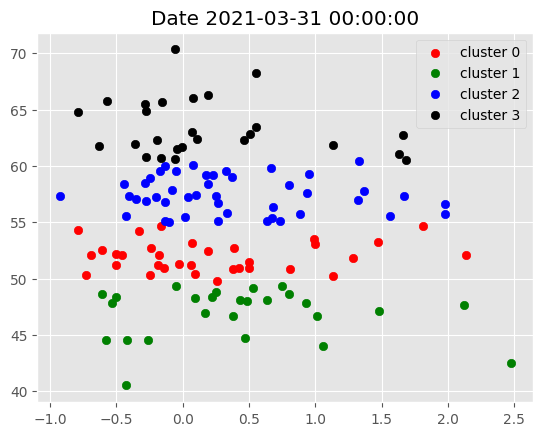

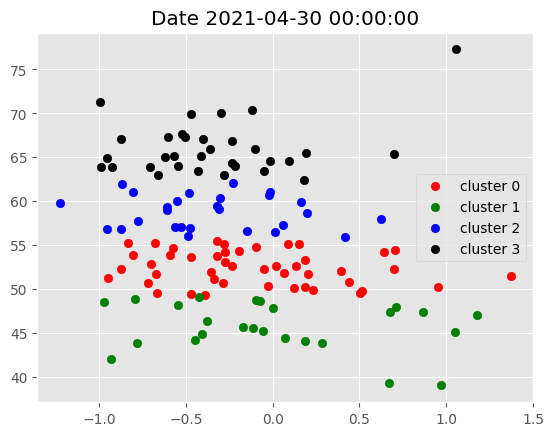

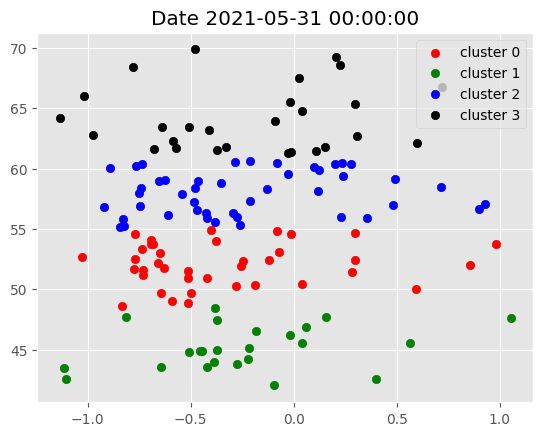

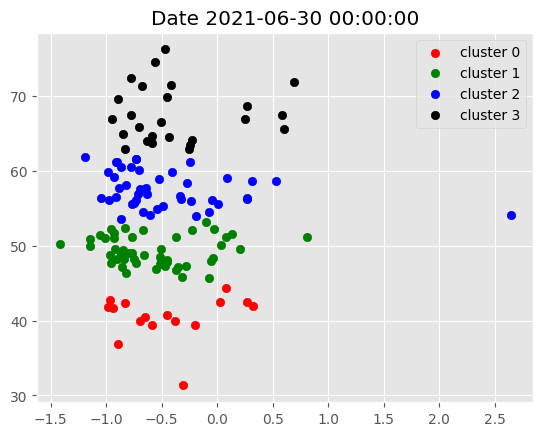

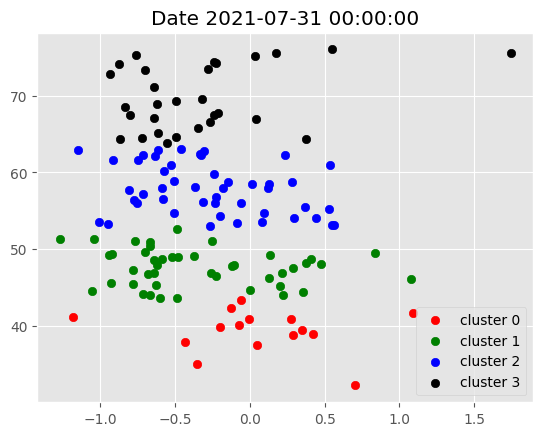

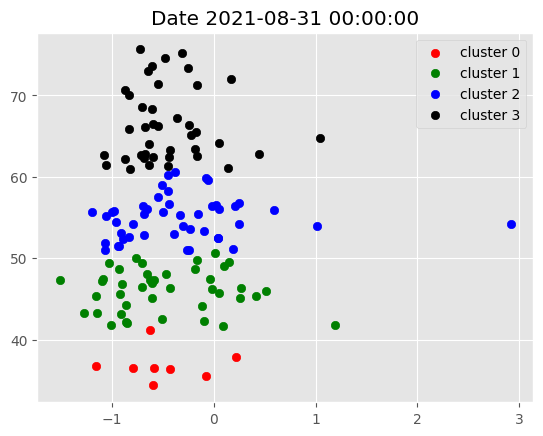

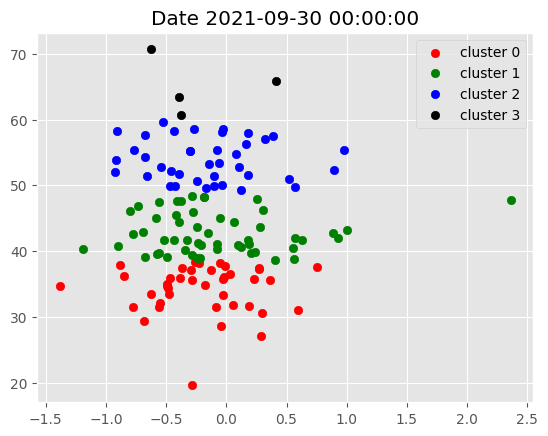

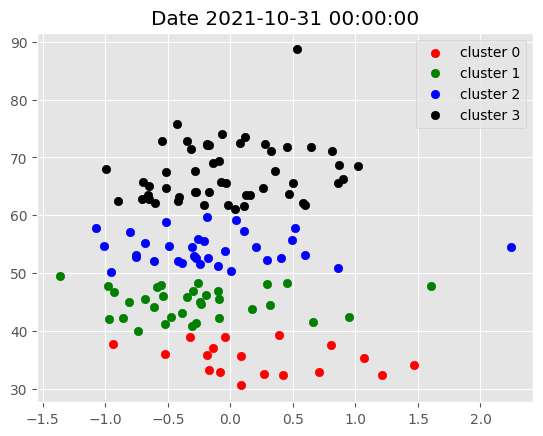

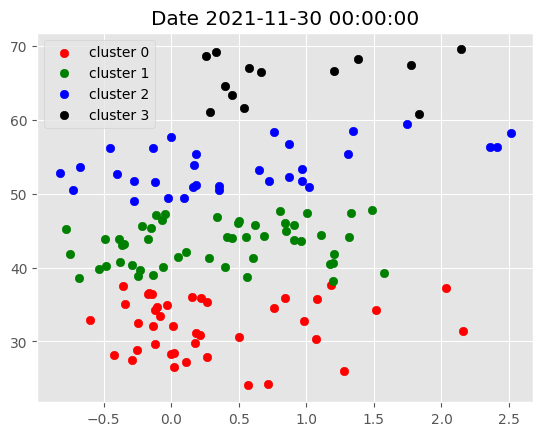

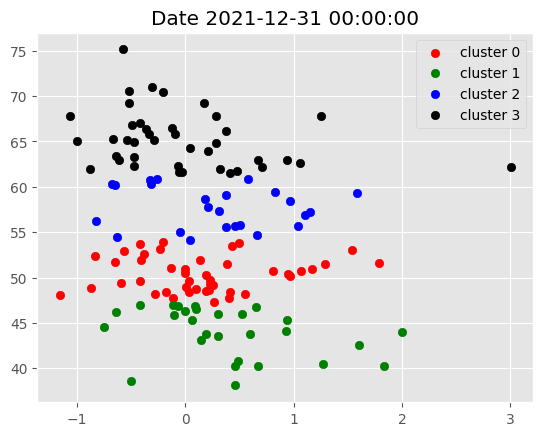

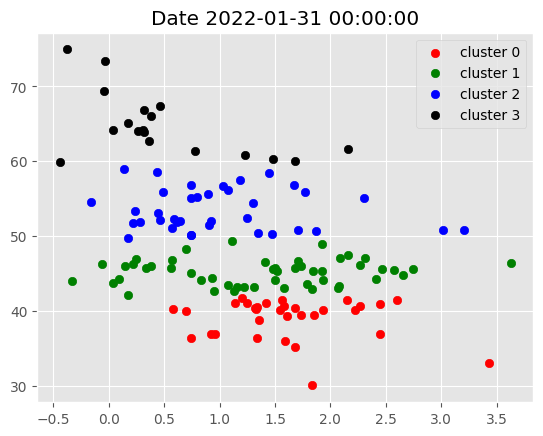

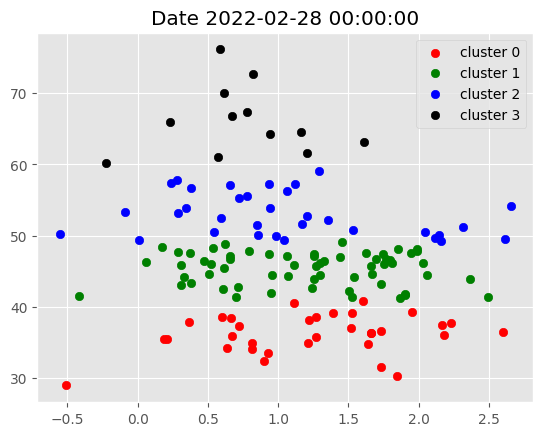

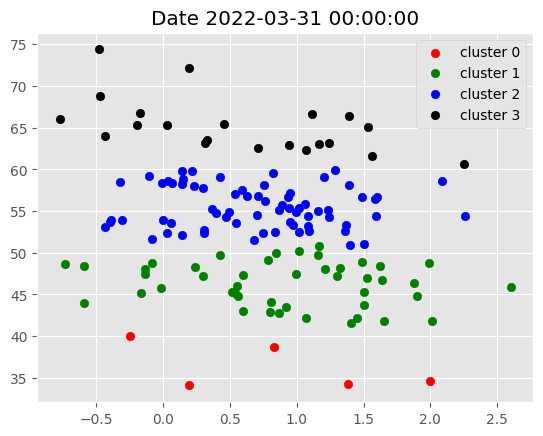

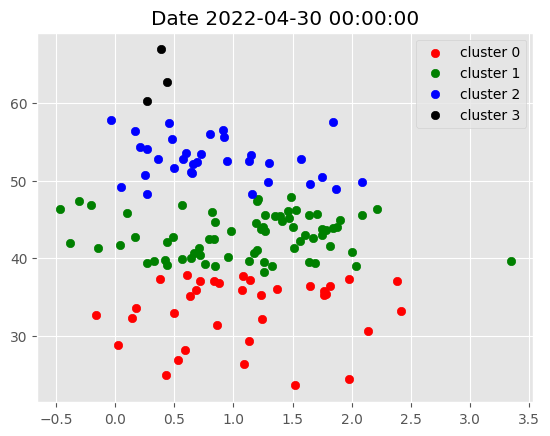

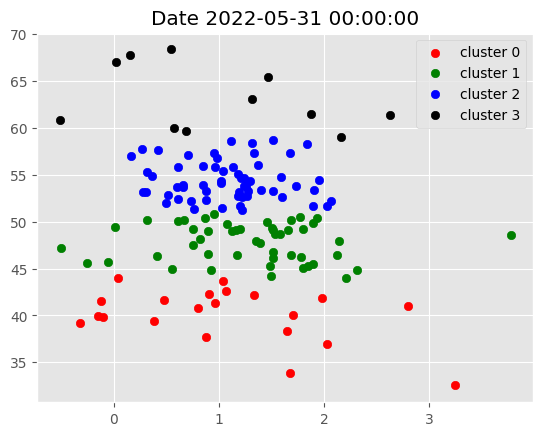

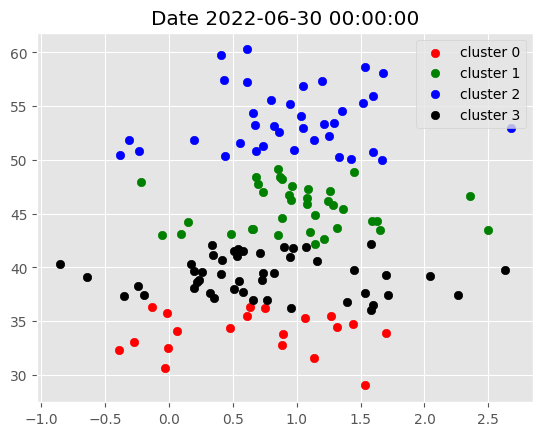

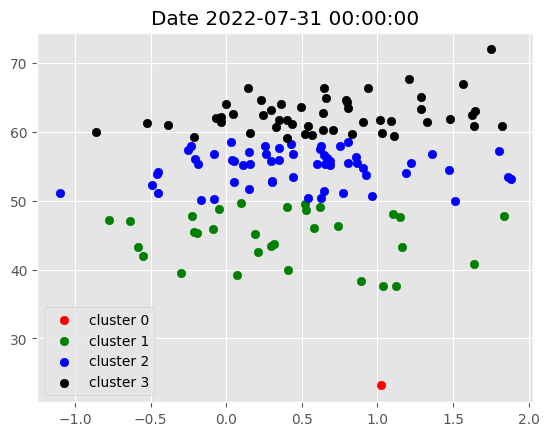

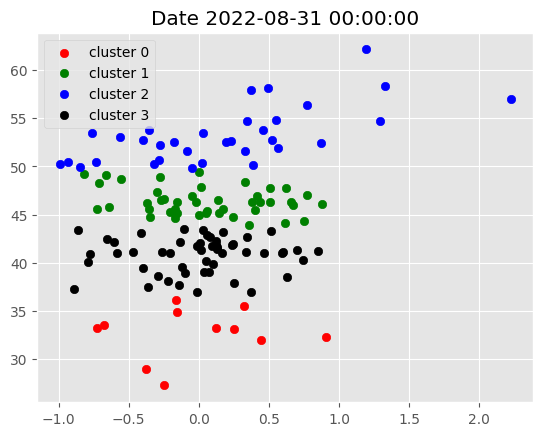

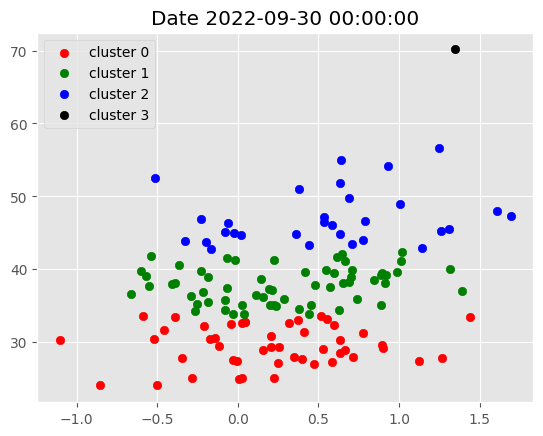

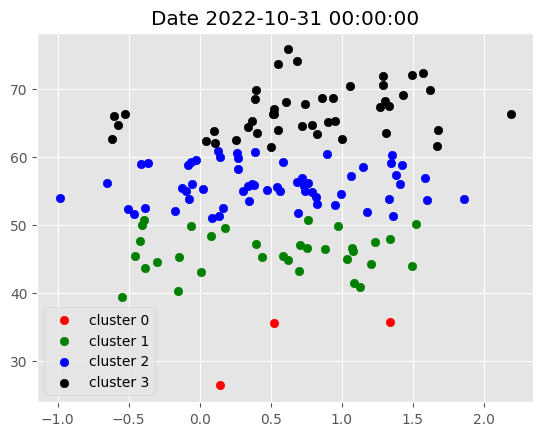

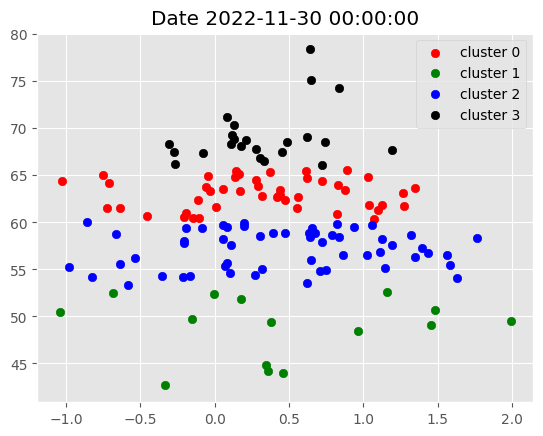

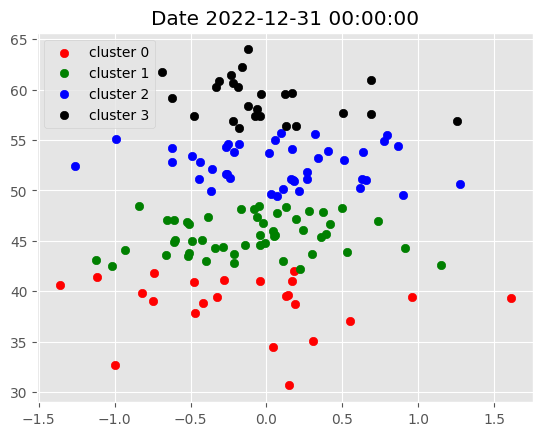

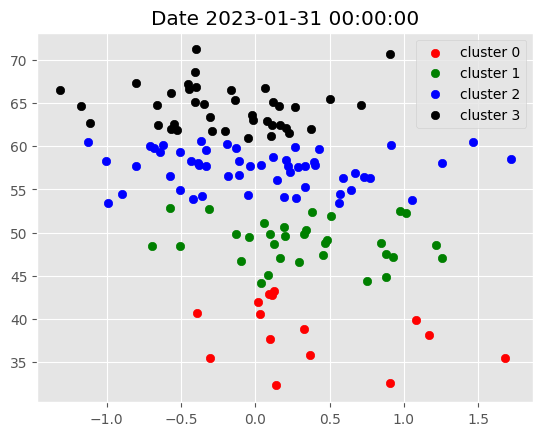

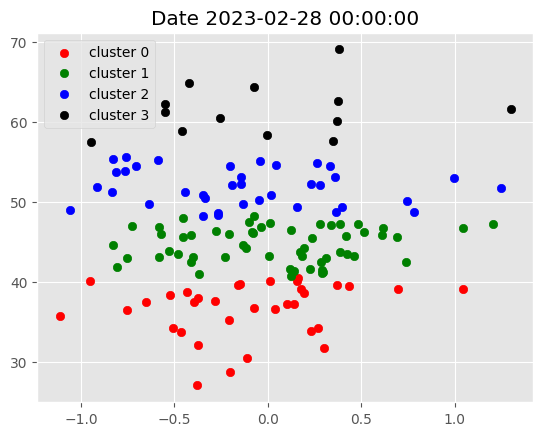

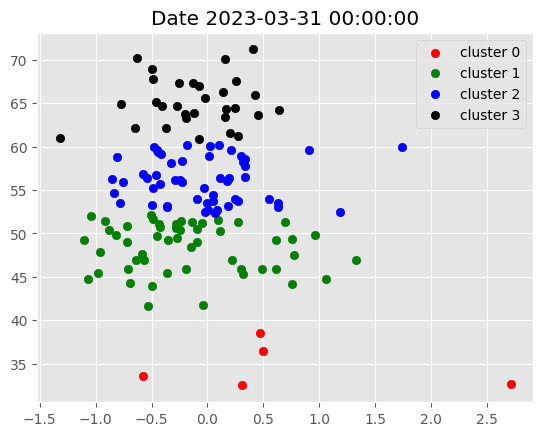

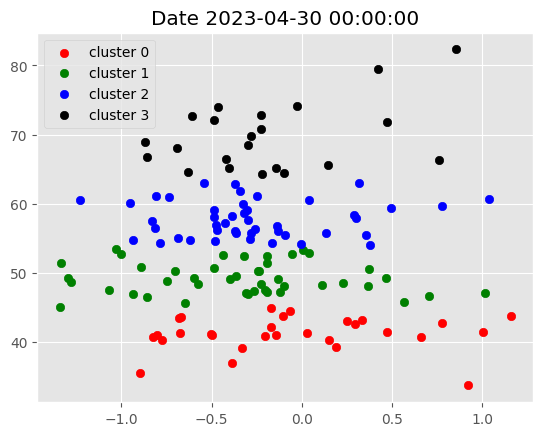

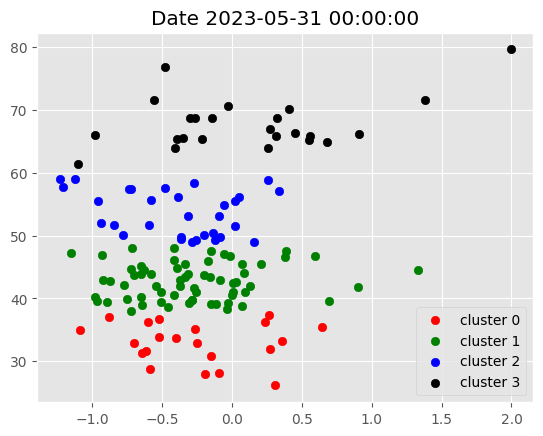

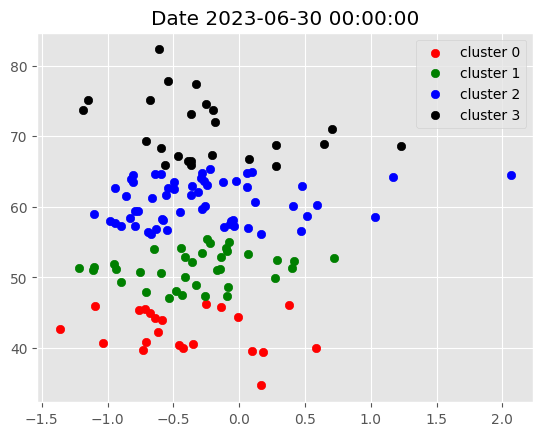

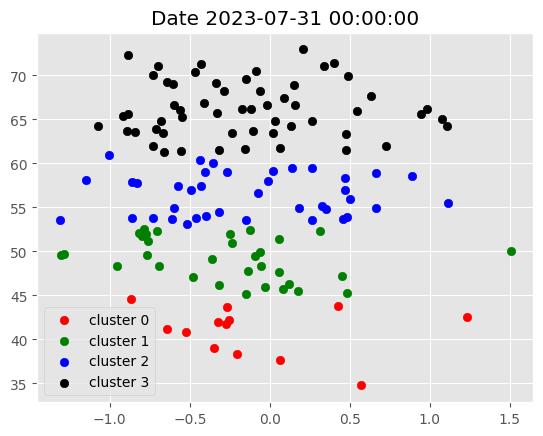

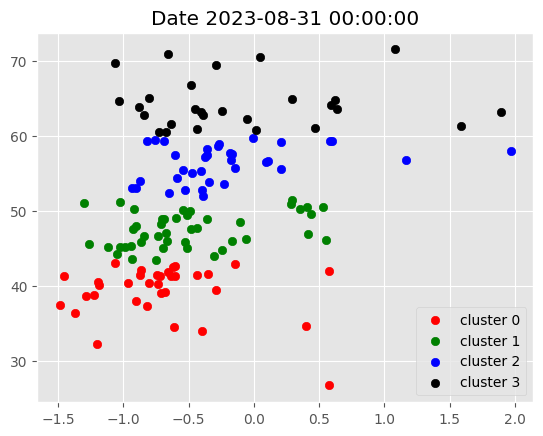

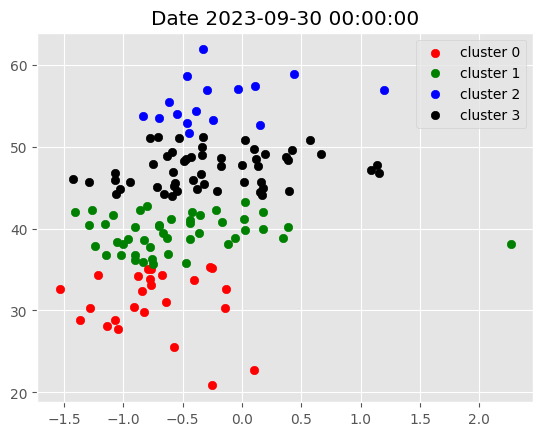

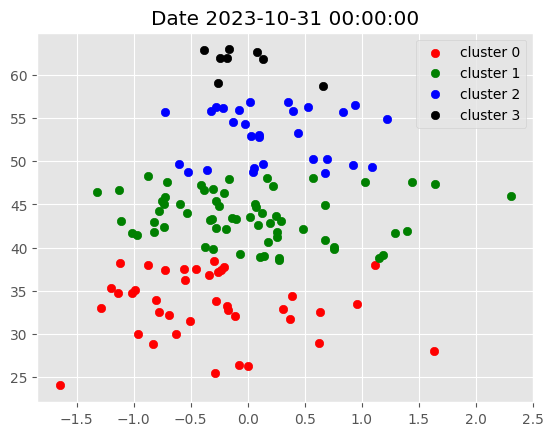

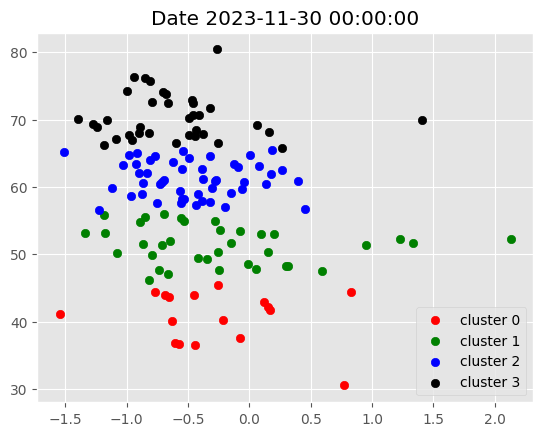

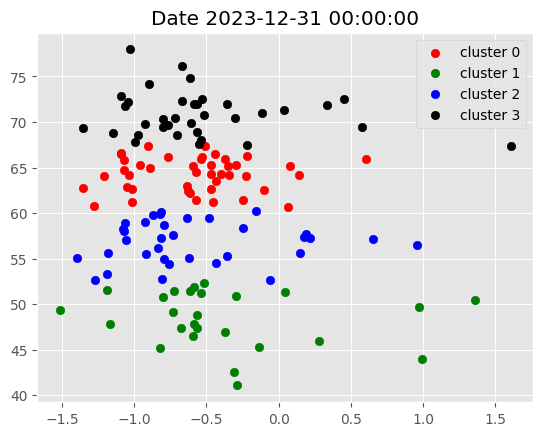

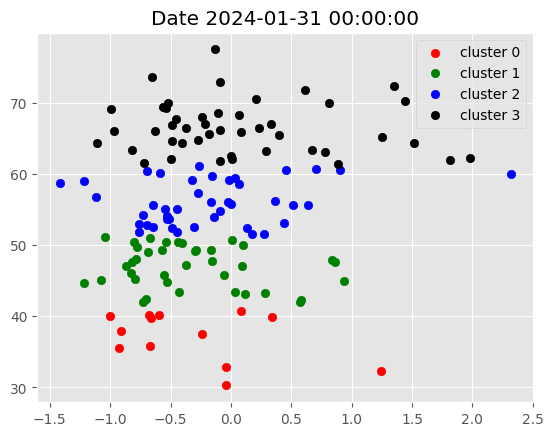

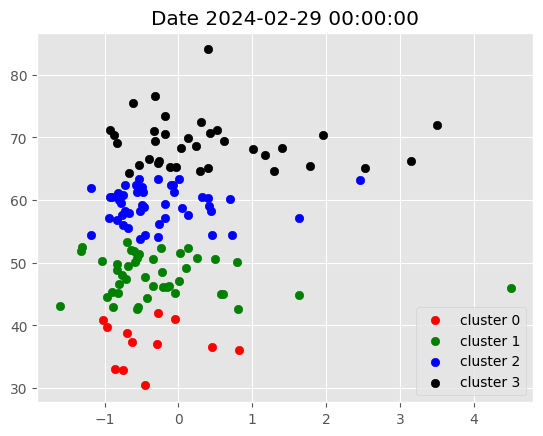

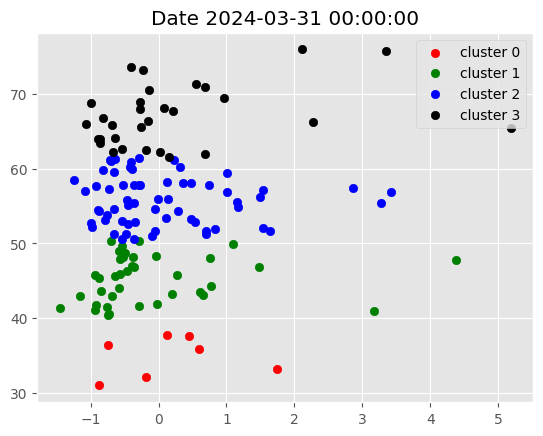

In [42]:
plt.style.use('ggplot')

for i in data.index.get_level_values('Dates').unique().tolist():
    
    g = data.xs(i, level=0)
    
    plt.title(f'Date {i}')
    
    plot_clusters(g)

# 5. For each month select assets based on the cluster and form a portfolio based on Efficient Frontier max sharpe ratio optimization

In [43]:
filtered_df = data[data['cluster']==3].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['Dates', 'Ticker'])

dates = filtered_df.index.get_level_values('Dates').unique().tolist()

fixed_dates = {}

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates

{'2021-04-01': ['ACN',
  'ADP',
  'AMAT',
  'AMT',
  'BAC',
  'CAT',
  'CI',
  'CSCO',
  'DE',
  'ELV',
  'FDX',
  'HD',
  'HUM',
  'IBM',
  'LIN',
  'LMT',
  'LOW',
  'MCD',
  'MMM',
  'MO',
  'NOC',
  'PG',
  'TGT',
  'TXN',
  'UNH',
  'UPS'],
 '2021-05-01': ['ACN',
  'AMT',
  'AMZN',
  'BLK',
  'BRK-B',
  'BSX',
  'CHTR',
  'DHR',
  'EL',
  'ELV',
  'GOOG',
  'GOOGL',
  'HD',
  'HUM',
  'IBM',
  'ISRG',
  'MCD',
  'MDLZ',
  'MDT',
  'META',
  'NOC',
  'PFE',
  'PM',
  'RTX',
  'SHW',
  'SPGI',
  'T',
  'TGT',
  'UNH',
  'UPS',
  'V',
  'WFC'],
 '2021-06-01': ['AMT',
  'AXP',
  'BLK',
  'BRK-B',
  'C',
  'CRM',
  'CVS',
  'ELV',
  'F',
  'FDX',
  'GS',
  'INTU',
  'JPM',
  'KO',
  'MDLZ',
  'MPC',
  'MRNA',
  'MS',
  'NEM',
  'NVDA',
  'RTX',
  'SCHW',
  'SHW',
  'TGT',
  'UNH',
  'UPS',
  'WFC'],
 '2021-07-01': ['AAPL',
  'ADBE',
  'AMD',
  'CHTR',
  'CMG',
  'DHR',
  'DXCM',
  'EBAY',
  'EL',
  'ILMN',
  'INTU',
  'ISRG',
  'LLY',
  'LULU',
  'MRNA',
  'MSFT',
  'NKE',
  'NOW',
  '

# 6. Define portfolio optimization function

In [44]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):
    
    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)
    
    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')
    
    weights = ef.max_sharpe()
    
    return ef.clean_weights()


In [45]:
stocks = data.index.get_level_values('Ticker').unique().tolist()

new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('Dates').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('Dates').unique()[-1])

new_df

[*********************100%***********************]  140 of 140 completed


Adj Close                                                  \
                 AAL        AAPL        ABBV         ABT         ACN   
Date                                                                   
2020-03-31     12.19   62.002243   63.388962   73.357864  153.571991   
2020-04-01     10.69   58.739864   61.084335   71.182495  145.501129   
2020-04-02     10.06   59.720036   62.507046   73.850563  146.996796   
2020-04-03      9.39   58.861774   61.042747   73.859856  143.121277   
2020-04-06      9.50   63.996719   63.006245   76.909088  156.196457   
...              ...         ...         ...         ...         ...   
2024-03-22     14.82  172.279999  176.798874  110.024338  336.198242   
2024-03-25     14.92  170.850006  176.878128  109.467110  332.532440   
2024-03-26     14.92  169.710007  177.532028  110.949753  335.092529   
2024-03-27     15.30  173.309998  178.681305  112.919983  339.624969   
2024-03-28     15.35  171.479996  180.415100  113.099098  345.273071   

                                                                        ...  \
                  ADBE         ADI         ADP        ADSK        AMAT  ...   
Date                                                                    ...   
2020-03-31  318.239990   83.267769  125.696541  156.100006   44.134171  ...   
2020-04-01  301.209991   78.103592  119.295853  139.220001   41.706890  ...   
2020-04-02  303.959991   81.456596  120.978806  137.050003   41.649097  ...   
2020-04-03  293.609985   80.397758  118.238266  139.000000   40.724411  ...   
2020-04-06  319.130005   88.979935  128.427902  152.320007   44.452034  ...   
...                ...         ...         ...         ...         ...  ...   
2024-03-22  499.519989  193.509995  247.610001  262.859985  210.250000  ...   
2024-03-25  507.230011  190.630005  244.199997  261.570007  208.460007  ...   
2024-03-26  507.600006  188.960007  245.070007  261.670013  206.669998  ...   
2024-03-27  504.399994  193.330002  248.330002  260.970001  208.000000  ...   
2024-03-28  504.600006  197.789993  249.740005  260.420013  206.229996  ...   

              Volume                                                           \
                UBER      UNH      UNP       UPS         V     VRTX        VZ   
Date                                                                            
2020-03-31  43126400  5450000  4247100   5391300  20613100  3300700  21251800   
2020-04-01  38538400  4548800  5125600   5762800  12595200  1482300  18672600   
2020-04-02  35838200  4636800  6009000   4039900  14051100  2503900  20159400   
2020-04-03  40572000  4650300  4088000   4471900  11994700  1989800  17612500   
2020-04-06  34692600  6365900  4865900   5642700  16479100  3046300  20284400   
...              ...      ...      ...       ...       ...      ...       ...   
2024-03-22   8863500  2847000  1676900   3939400   8743000   821700  17815600   
2024-03-25  10254300  2786100  1974700   3807700   8519200   732800  14587200   
2024-03-26  12438300  3113300  2801900  18208800   8752400   952400  17854100   
2024-03-27  13157000  2653100  2150500   7078800   5190700   905400  19260100   
2024-03-28  13421900  3820000  2265900   5197000   5844400  1092100  19771400   

                                          
                 WFC       WMT       XOM  
Date                                      
2020-03-31  36920300  26258400  41491600  
2020-04-01  48497400  28269600  36045900  
2020-04-02  33113500  29515500  62000200  
2020-04-03  32735800  28625100  48425700  
2020-04-06  36056100  47768700  41301900  
...              ...       ...       ...  
2024-03-22  13736200  14025400  14695400  
2024-03-25  15028200  14186600  14011700  
2024-03-26  11445900  13738300  13152300  
2024-03-27  13762800  14363400  12415700  
2024-03-28  14619000  17535100  18482100  

[1006 rows x 840 columns]

* Calculate daily returns for each stock which could land up in our portfolio.

* Then loop over each month start, select the stocks for the month and calculate their weights for the next month.

* If the maximum sharpe ratio optimization fails for a given month, apply equally-weighted weights.

* Calculated each day portfolio return.

In [46]:
returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    
    try:

        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')

        cols = fixed_dates[start_date]

        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')

        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        
        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]
        
        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                   lower_bound=round(1/(len(optimization_df.columns)*2),3))

            weights = pd.DataFrame(weights, index=pd.Series(0))
            
            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
        
        if success==False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                     index=optimization_df.columns.tolist(),
                                     columns=pd.Series(0)).T
        
        temp_df = returns_dataframe[start_date:end_date]

        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
                   .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                          left_index=True,
                          right_index=True)\
                   .reset_index().set_index(['Date', 'index']).unstack().stack()

        temp_df.index.names = ['date', 'ticker']

        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']

        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

Max Sharpe Optimization failed for 2021-10-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-07-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-09-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-10-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2023-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2023-11-01, Continuing with Equal-Weights
'return'


,Strategy Return
date,
2021-04-01,0.008140
2021-04-05,0.010365
2021-04-06,-0.004127
2021-04-07,-0.002734
2021-04-08,0.002646
...,...
2024-03-22,-0.000951
2024-03-25,-0.001574
2024-03-26,-0.002593


# 8. Visualize Portfolio returns and compare to SP500 returns.

In [47]:
spy = yf.download(tickers='SPY',
                  start='2015-01-01',
                  end=dt.date.today())

spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'}, axis=1)

portfolio_df = portfolio_df.merge(spy_ret,
                                  left_index=True,
                                  right_index=True)

portfolio_df

[*********************100%***********************]  1 of 1 completed


,Strategy Return,SPY Buy&Hold
2021-04-01,0.008140,0.010741
2021-04-05,0.010365,0.014251
2021-04-06,-0.004127,-0.000591
2021-04-07,-0.002734,0.001157
2021-04-08,0.002646,0.004736
...,...,...
2024-03-22,-0.000951,-0.001898
2024-03-25,-0.001574,-0.002767
2024-03-26,-0.002593,-0.001849
2024-03-27,0.003261,0.008369


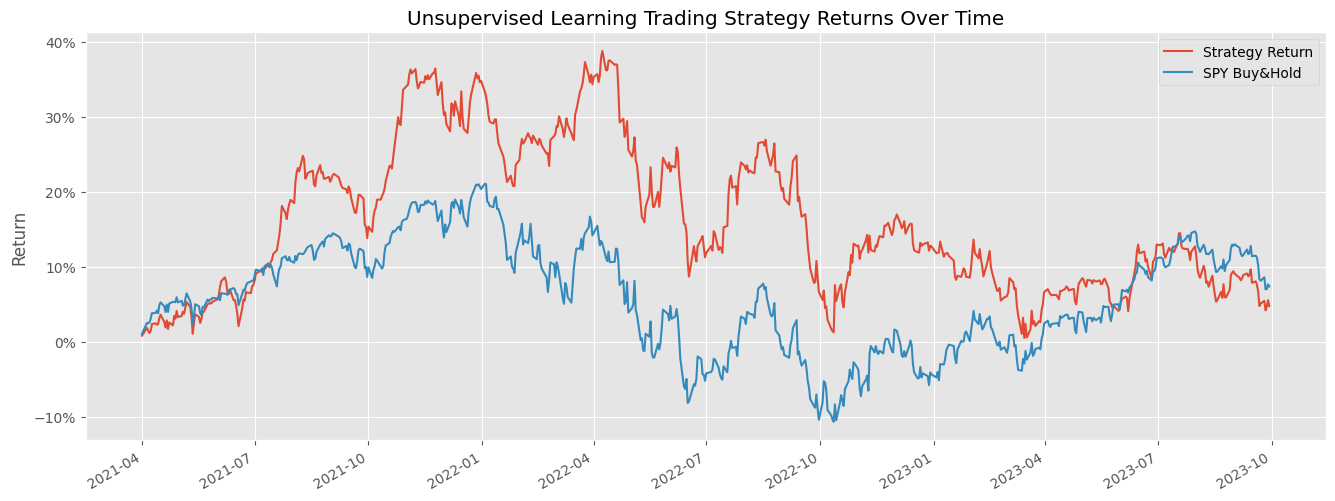

In [48]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cumulative_return[:'2023-09-29'].plot(figsize=(16,6))

plt.title('Unsupervised Learning Trading Strategy Returns Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()
